# Introducción al aprendizaje automatizado - TP final
## Autora: Aldana Zarate
### Ejercicio 1

In [2]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import datasets, layers, models

#from google.colab import files

In [3]:
# Funciones auxiliares a usar en los 3 ejercicios

def graficar_curvas_error(train_error, val_error, title):
    n = list(range(1, len(train_error) + 1))
    plt.plot(n, train_error, label = 'Train error')
    plt.plot(n, val_error, label = 'Validation error')
    plt.xlabel('Epoca')
    plt.ylabel('Error')
    plt.legend()
    plt.title(title)
    plt.show()

def get_train_val_errors(history):
    train_error = list(map(lambda x: 1 - x, history.history['accuracy']))
    val_error = list(map(lambda x: 1 - x, history.history['val_accuracy']))

    return train_error, val_error

def get_test_error(model):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0
    test_loss, test_acc = model.evaluate(test_images,  test_labels)
    return 1 - test_acc

def save_metrics_to_csv(epocas, train_error, val_error, csv_name):
    datos_errores = {'Epoca': epocas, 'Train error': train_error, 'Val error': val_error}

    df = pd.DataFrame(datos_errores)
    df.to_csv(csv_name)
    files.download(csv_name)

def save_test_error_to_csv(test_error, csv_name):
    error_test = {'Error test': [test_error]}

    df = pd.DataFrame(error_test)
    df.to_csv(csv_name)
    files.download(csv_name)

In [4]:
def ej1(model, epocas):
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    # Partimos el conjunto de train para obtener el de validacion
    train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
    )

    # Compilamos el modelo
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    # Entrenamos el modelo
    history = model.fit(
      train_images, 
      train_labels, 
      epochs=epocas, 
      validation_data=(val_images, val_labels)
    )

    return history, model

In [ ]:
# Procedemos a crear la base convolucional para este ejercicio
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(128))
model1.add(layers.Dense(128))
model1.add(layers.Dense(10))

history_ej1, model_ej1 = ej1(model1, 10)

train_error_ej1, val_error_ej1 = get_train_val_errors(history_ej1)
test_error_ej1 = get_test_error(model_ej1)

save_metrics_to_csv(list(range(1, len(train_error_ej1) + 1)), train_error_ej1, val_error_ej1, 'errores_ej_1.csv')
save_test_error_to_csv(test_error_ej1, 'test_error_ej1.csv')


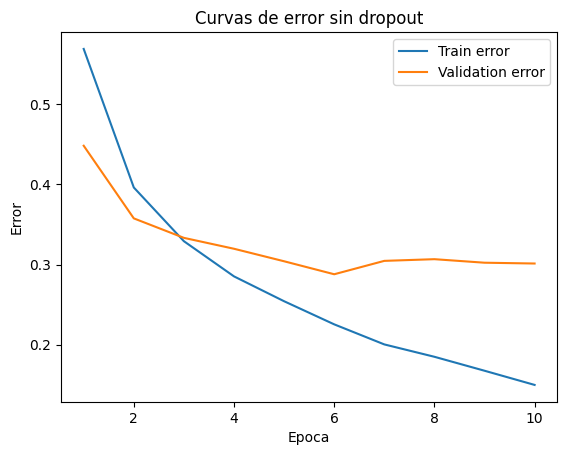

Error de test:  0    0.3089
Name: Error test, dtype: float64


In [12]:
# Analisis datos ej 1
datos_errores = pd.read_csv('metrics/errores_ej_1.csv')
datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error sin dropout')
error_test = pd.read_csv('metrics/test_error_ej1.csv')
error_test = error_test.drop('Unnamed: 0', axis=1)
print('Error de test: ', error_test['Error test'])

comentarios

# Ejercicio 2

In [ ]:
for (p1,p2) in [(0.2,0), (0.5, 0) , (0.2, 0.2), (0.5, 0.2), (0.2, 0.5), (0.5, 0.5)]:
    model2 = models.Sequential()
    model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    if p1 > 0:
        model2.add(layers.Dropout(p1, input_shape=(32, 32, 3)))
    model2.add(layers.Flatten())
    model2.add(layers.Dense(64))
    if p2 > 0:
        model2.add(layers.Dropout(p2, input_shape=(32, 32, 3)))
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(10))

    history_ej2, model_ej2 = ej1(model2, 20)
    train_error_ej2, val_error_ej2 = get_train_val_errors(history_ej2)
    test_error_ej2 = get_test_error(model_ej2)

    save_metrics_to_csv(list(range(1, len(train_error_ej2) + 1)), train_error_ej2, val_error_ej2, 'errores_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')
    save_test_error_to_csv(test_error_ej2, 'error_test_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')

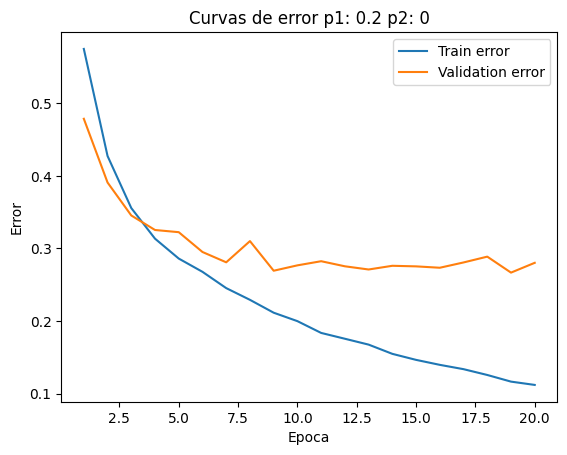

Error de test:  0    0.2931
Name: Error test, dtype: float64


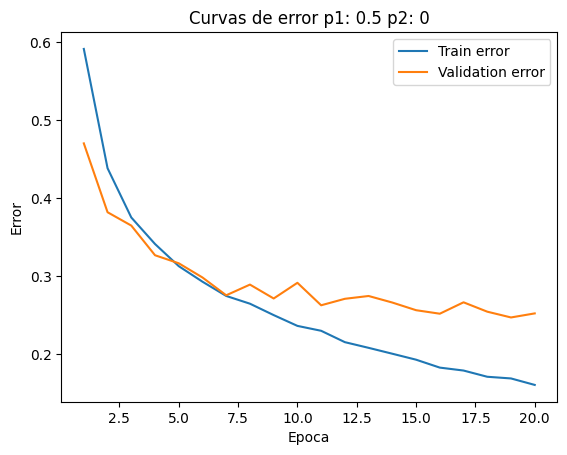

Error de test:  0    0.2609
Name: Error test, dtype: float64


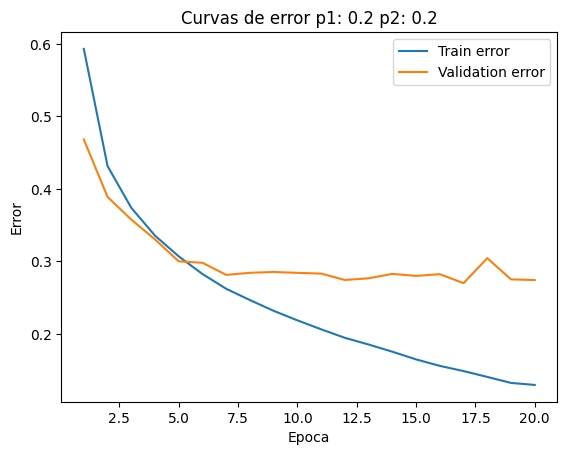

Error de test:  0    0.2826
Name: Error test, dtype: float64


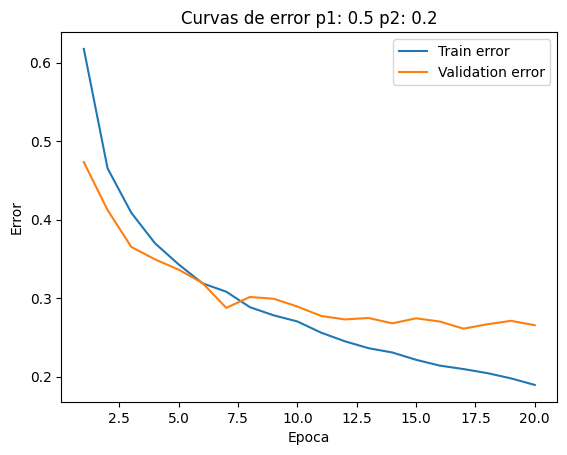

Error de test:  0    0.2725
Name: Error test, dtype: float64


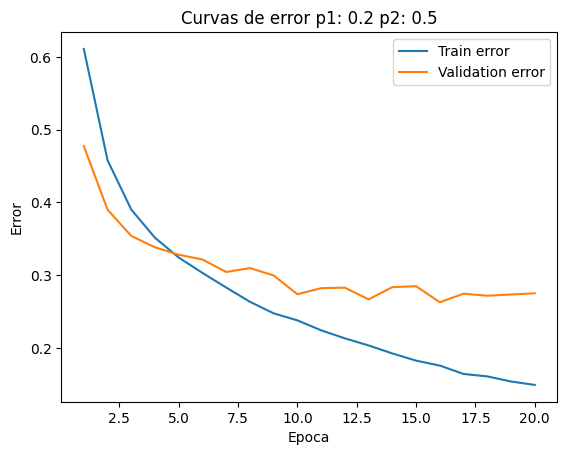

Error de test:  0    0.2871
Name: Error test, dtype: float64


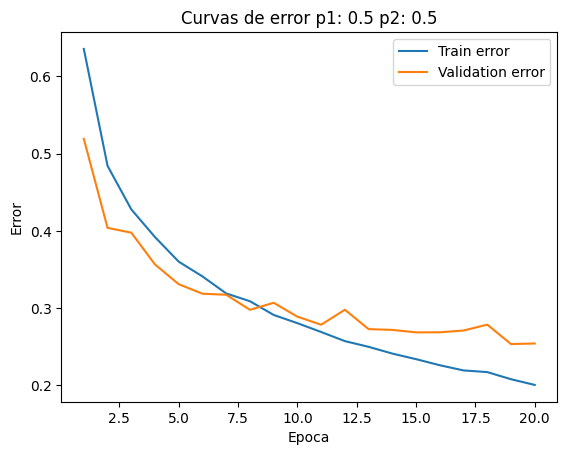

Error de test:  0    0.268
Name: Error test, dtype: float64


In [11]:
# Análisis datos ej 2
for (p1,p2) in [(0.2,0), (0.5, 0) , (0.2, 0.2), (0.5, 0.2), (0.2, 0.5), (0.5, 0.5)]:
    datos_errores = pd.read_csv('metrics/errores_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')
    datos_errores = datos_errores.drop('Unnamed: 0', axis=1)
    graficar_curvas_error(datos_errores['Train error'], datos_errores['Val error'], 'Curvas de error p1: '+str(p1)+' p2: '+str(p2))
    error_test = pd.read_csv('metrics/error_test_ej2_p1_'+str(p1)+'_p2_'+str(p2)+'.csv')
    error_test = error_test.drop('Unnamed: 0', axis=1)
    print('Error de test: ', error_test['Error test'])

comentarios

# Ejercicio 3

In [ ]:
# Dropout óptimo: p1: 0.5 p2: 0.5

img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

model3 = models.Sequential()
model3.add(data_augmentation)
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model3.add(layers.Dense(128))
model3.add(layers.Dense(128))
model3.add(layers.Dense(10))

history_ej3, model_ej3 = ej1(model3, 20)
train_error_ej3, val_error_ej3 = get_train_val_errors(history_ej3)
test_error_ej3 = get_test_error(model_ej3)

save_metrics_to_csv(list(range(1, len(train_error_ej3) + 1)), train_error_ej3, val_error_ej3, 'errores_ej3.csv')
save_test_error_to_csv(test_error_ej3, 'error_test_ej3.csv')

In [ ]:
#Análisis ej3 (subió el test error a de 26% a 34% con data augmentation)

# Ejercicio 4

Al ser un problema muy presente el sobreajuste sobre todos los modelos, se me ocurre seguir utilizando técnicas de regularización sobre el modelo. La combinación del dropout óptimo + data augmentation no dio muy buenos resultados ya que hasta hizo que creciera levemente el error, así que voy a proceder por probar con más capas de dropout en capas un poco menos profundas del modelo, ya que en el ejercicio 2 estas comienzan a estar recién en una profundidad bastante considerable. Procedo por probar valores pequeños al principio para que no regularice tanto en esta instancia tampoco.

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2, input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Dropout(0.2, input_shape=(32, 32, 3)))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64))
model4.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model4.add(layers.Dense(128))
model4.add(layers.Dense(128))
model4.add(layers.Dense(10))

history_ej4, model_ej4 = ej1(model4, 20)
train_error_ej4, val_error_ej4 = get_train_val_errors(history_ej4)
test_error_ej4 = get_test_error(model_ej4)

save_metrics_to_csv(list(range(1, len(train_error_ej4) + 1)), train_error_ej4, val_error_ej4, 'errores_ej4.csv')
save_test_error_to_csv(test_error_ej4, 'error_test_ej4.csv')

In [ ]:
# Análisis datos ej4

# Ejercicio 5

In [ ]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
          layers.RandomBrightness(factor=0.2)
     ]
)

model5 = models.Sequential()
model5.add(data_augmentation)
model5.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model5.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model5.add(layers.Flatten())
model5.add(layers.Dense(64))
model5.add(layers.Dropout(0.5, input_shape=(32, 32, 3)))
model5.add(layers.Dense(128))
model5.add(layers.Dense(128))
model5.add(layers.Dense(10))

history_ej5, model_ej5 = ej1(model5, 20)
train_error_ej5, val_error_ej5 = get_train_val_errors(history_ej5)
test_error_ej5 = get_test_error(model_ej5)

save_metrics_to_csv(list(range(1, len(train_error_ej5) + 1)), train_error_ej5, val_error_ej5, 'errores_ej5.csv')
save_test_error_to_csv(test_error_ej5, 'error_test_ej5.csv')

In [ ]:
# Análisis datos ej5